In [2]:
pwd

'/home/kuldeep/Downloads/Notes-AI-full/PRACTICE/diabetes_prediction-main'

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [13]:
df.shape #shape info
print("The dataset contains:", df.shape, "rows and columns")

The dataset contains: (100000, 9) rows and columns


In [17]:
df.info() #basic info about the attributes in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [18]:
df.describe().T #statistics

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [24]:
df.isnull().sum() #check null values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [25]:
df.duplicated().sum() #check duplicate values

3854

In [28]:
df.drop_duplicates(inplace = True) #delete duplicates

In [29]:
df.shape

(96146, 9)

In [33]:
df.columns.dtype

dtype('O')

In [34]:
#check unique values in the columns
column_names = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]

for name in column_names:
    print(name, df[name].unique())

gender ['Female' 'Male' 'Other']
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes [0 1]


# Plotting

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

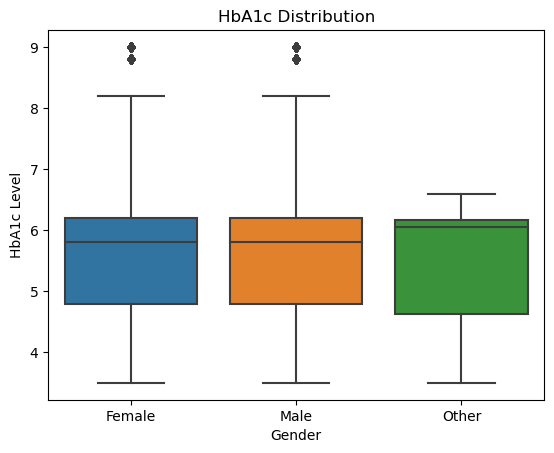

In [45]:
sns.boxplot(x=df['gender'], y=df['HbA1c_level'])
plt.title('HbA1c Distribution')
plt.xlabel('Gender')
plt.ylabel('HbA1c Level')
plt.show()

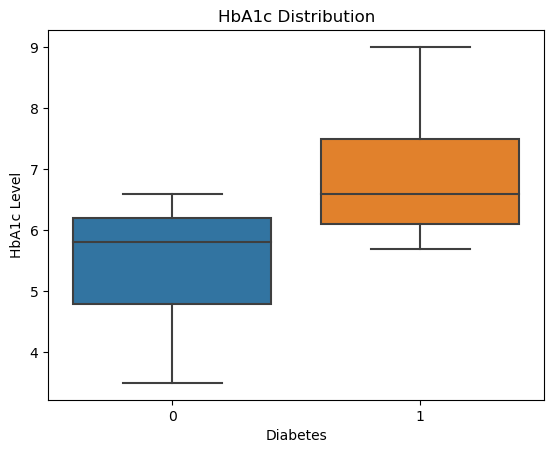

In [42]:
sns.boxplot(x=df['diabetes'], y=df['HbA1c_level'])
plt.title('HbA1c Distribution')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

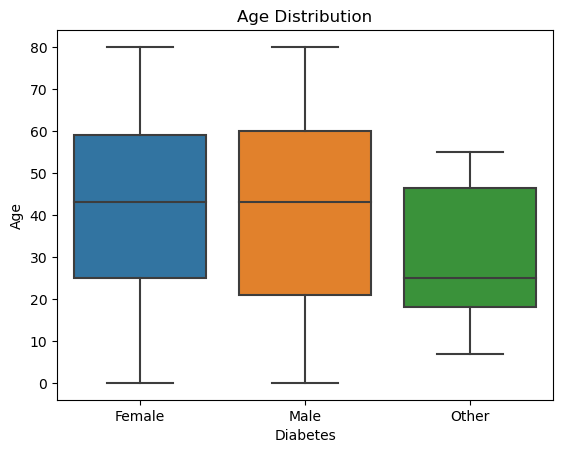

In [43]:
sns.boxplot(x=df['gender'], y=df['age'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

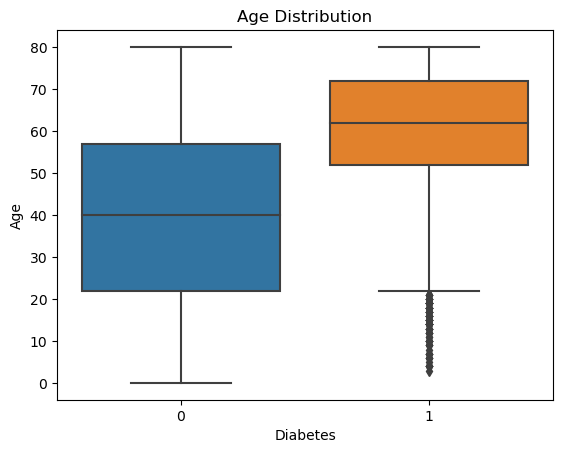

In [44]:
sns.boxplot(x=df['diabetes'], y=df['age'])
plt.title('Age Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

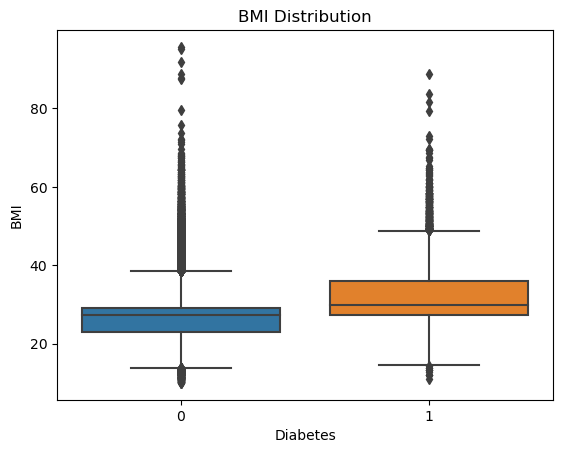

In [46]:
sns.boxplot(x=df['diabetes'], y=df['bmi'])
plt.title('BMI Distribution')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

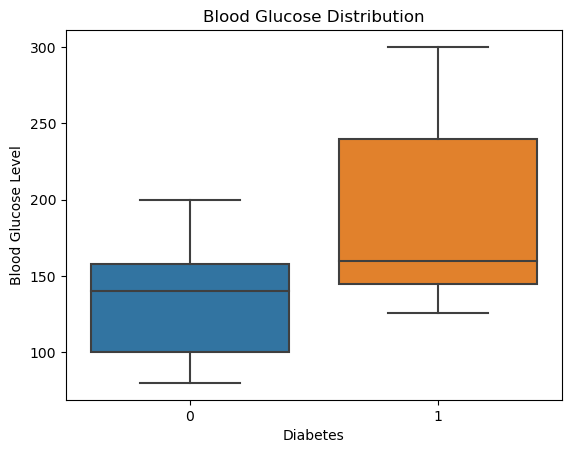

In [47]:
sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'])
plt.title('Blood Glucose Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

# Heatmap

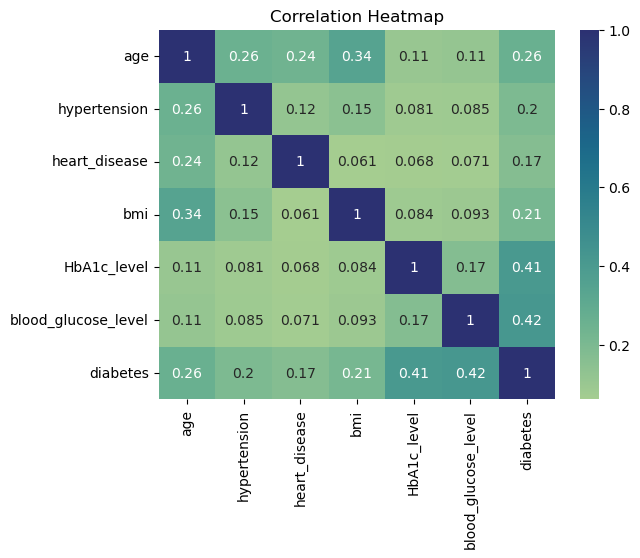

In [49]:
corr = df[['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

# Handling categorical variables
1. Gender
2. smoking_history

# One-hot encoding

In [52]:
dummy_df_gender = pd.get_dummies(df[["gender"]], drop_first=True)
dummy_df_gender.head()

,gender_Male,gender_Other
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0


In [53]:
dummy_df_sh = pd.get_dummies(df[["smoking_history"]], drop_first=True)
dummy_df_sh.head()

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0


# Concat with the df

In [55]:
X = pd.concat([df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']],dummy_df_gender, dummy_df_sh], axis=1)
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


# Standardization

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X[0]
y = df['diabetes']

In [60]:
X

array([[1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67467467, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34934935, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.82482482, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2992993 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.71221221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [62]:
y.value_counts() 

0    87664
1     8482
Name: diabetes, dtype: int64

we can see that as "0" is for non-diabetic and "1" for diabetic, so the class is imbalanced. We will use SMOTE for balancing.

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

# We will use different algorithms with their best hyperparameters

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [67]:
algos = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet', None]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100],
            'loss': ['log_loss', 'deviance', 'exponential']
        }
    },
    'bagging_classifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gaussian_naive_bayes': {
        'model': GaussianNB(),
        'params': {
        }
    },
    'multinomial_naive_bayes': {
        'model': MultinomialNB(),
        'params': {
        }
    }
}

# Training the model to find the best hyperparameters

In [68]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV

In [71]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   ) 

converting "scores to dataframe"

In [72]:
score_models = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score_models

,model,best_score,best_params
0,logistic_regression,0.886517,{'penalty': 'l2'}
1,SVM,0.897433,{}
2,decision_tree,0.964307,"{'criterion': 'entropy', 'splitter': 'best'}"
3,random_forest,0.975760,"{'criterion': 'log_loss', 'n_estimators': 50}"
4,ada_boost_classifier,0.956590,{'n_estimators': 100}
5,gradient_boosting_classifier,0.957566,"{'loss': 'log_loss', 'n_estimators': 100}"
6,bagging_classifier,0.976496,{'n_estimators': 50}
7,gaussian_naive_bayes,0.646062,{}
8,multinomial_naive_bayes,0.620116,{}


# Train, test split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# model fitting

In [76]:
model_rf = RandomForestClassifier(n_estimators=50, criterion='log_loss')

model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=50)

In [78]:
model_rf.score(X_test, y_test)

0.976472936747847

In [81]:
y_pred_rf = model_rf.predict(X_test)

In [82]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

# Confusion matrix for random forest

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[17117,   416],
       [  409, 17124]])

# Heatmap of confusion matrix for Random forest

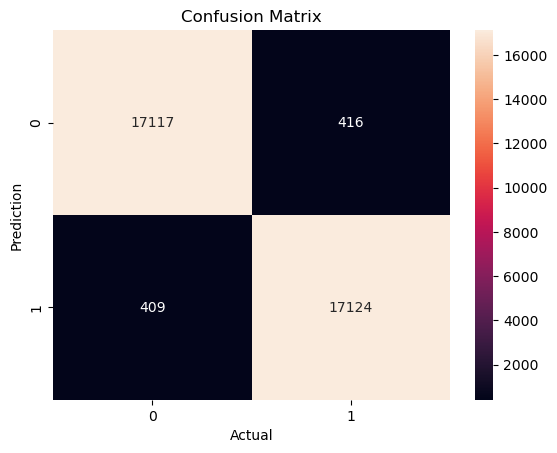

In [88]:
sns.heatmap(cm_rf, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [93]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17533
           1       0.98      0.98      0.98     17533

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



In [77]:
model_bc = BaggingClassifier(n_estimators=50)

model_bc.fit(X_train, y_train)

BaggingClassifier(n_estimators=50)

In [79]:
model_bc.score(X_test, y_test)

0.9764159014429932

In [83]:
y_pred_bc = model_bc.predict(X_test)

In [84]:
y_pred_bc

array([0, 0, 0, ..., 0, 0, 0])

# Confusion matrix for baggingclassifier

In [89]:
cm_bc = confusion_matrix(y_test, y_pred_bc)
cm_bc

array([[17239,   294],
       [  533, 17000]])

# Heatmap of confusion matrix for BaggingClassifier

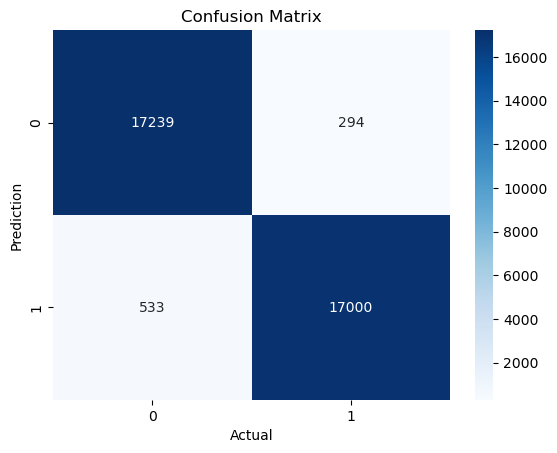

In [91]:
sns.heatmap(cm_bc, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [92]:
print(classification_report(y_test, y_pred_bc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17533
           1       0.98      0.97      0.98     17533

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



# Let's us see the effect of dimesionality reduction

# Principal component analysis (PCA)

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(0.95)

X_pca = pca.fit_transform(X)

In [96]:
X_pca.shape #SHAPE

(175328, 10)

# Because RF performed better than bagging classifier so let's do PCA with RF

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=10, stratify=y)
model = RandomForestClassifier(n_estimators=50, criterion='log_loss')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9472708606627502

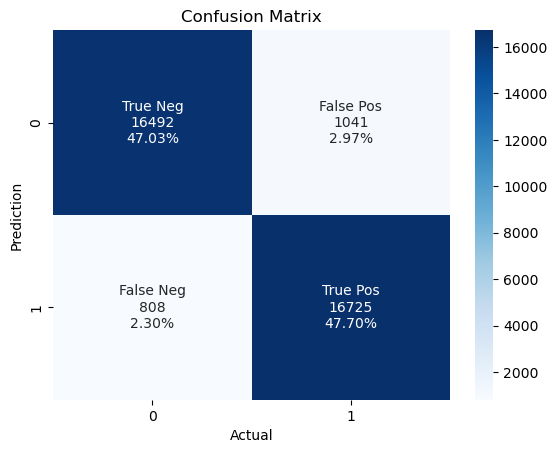

In [110]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     17533
           1       0.94      0.95      0.95     17533

    accuracy                           0.95     35066
   macro avg       0.95      0.95      0.95     35066
weighted avg       0.95      0.95      0.95     35066



# We can clearly see from the above results that randomforest classifier is the best model and can further be used for prediction.